In [37]:
import time
import datetime
import numpy as np
import pandas as pd
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [14]:
sales = pd.read_csv("/Users/roblespaeza96/Desktop/DT Certificate /Caps/capstone-project/sales_train.csv")
item_cat = pd.read_csv("/Users/roblespaeza96/Desktop/DT Certificate /Caps/capstone-project/item_categories.csv")
items = pd.read_csv("/Users/roblespaeza96/Desktop/DT Certificate /Caps/capstone-project/items.csv")
shop = pd.read_csv("/Users/roblespaeza96/Desktop/DT Certificate /Caps/capstone-project/shops.csv")
test = pd.read_csv("/Users/roblespaeza96/Desktop/DT Certificate /Caps/capstone-project/test.csv")
result = pd.read_csv("/Users/roblespaeza96/Desktop/DT Certificate /Caps/capstone-project/results - results.csv")

In [15]:
df1 = test.merge(result, left_on = 'ID', right_on = 'id')

In [16]:
df1.head()

,ID,shop_id,item_id,id,item_cnt_month
0,0,5,5037,0,0.5
1,1,5,5320,1,0.5
2,2,5,5233,2,0.5
3,3,5,5232,3,0.5
4,4,5,5268,4,0.5


In [17]:
df1.drop(['ID'], axis = 1)
df1.rename(columns={"id": "ID"})
df1 = df1[["ID", "shop_id", "item_id","item_cnt_month"]]

In [21]:
df1['item_cnt_month'] = round(df1['item_cnt_month'], 2)

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              214200 non-null  int64  
 1   shop_id         214200 non-null  int64  
 2   item_id         214200 non-null  int64  
 3   item_cnt_month  214200 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 8.2 MB


In [50]:
df_litem = df1.groupby(by = ['shop_id'])['item_cnt_month'].nlargest(5)

In [30]:
df_sum = df1.groupby(by = ['shop_id'])['item_cnt_month'].sum()
df_sum = df_sum.reset_index()

In [34]:
df_sum = df_sum.sort_values(by = 'item_cnt_month', ascending = False)

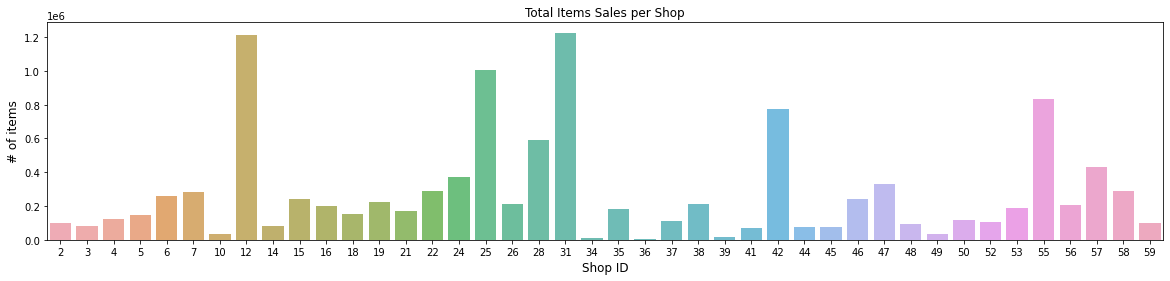

In [48]:
# plot
plt.figure(figsize=(20,4))
ax=sns.barplot(df_sum.shop_id, df_sum.item_cnt_month, alpha=0.8)
plt.title("Total Items Sales per Shop")
plt.ylabel("# of items", fontsize=12)
plt.xlabel("Shop ID", fontsize=12)
plt.show()

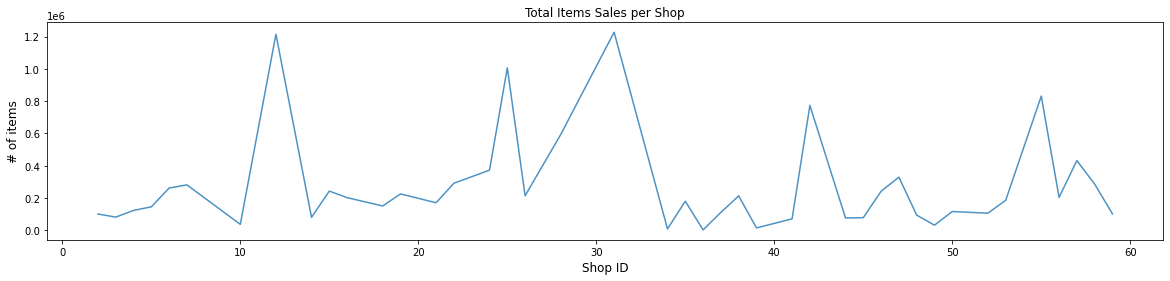

In [49]:
# plot
plt.figure(figsize=(20,4))
ax=sns.lineplot(df_sum.shop_id, df_sum.item_cnt_month, alpha=0.8)
plt.title("Total Items Sales per Shop")
plt.ylabel("# of items", fontsize=12)
plt.xlabel("Shop ID", fontsize=12)
plt.show()

In [58]:
df_litem = df_litem.reset_index()
df_litem = df_litem.rename(columns={"level_1": "item_id"})

In [59]:
df_litem.head(10)

,index,shop_id,item_id,item_cnt_month
0,0,2,20674,12618.09
1,1,2,20992,6659.09
2,2,2,22747,6172.89
3,3,2,20670,4093.17
4,4,2,20414,3761.37
5,5,3,15574,12922.56
6,6,3,15343,9540.00
7,7,3,15342,8209.79
8,8,3,15661,5821.15
9,9,3,16505,4585.15


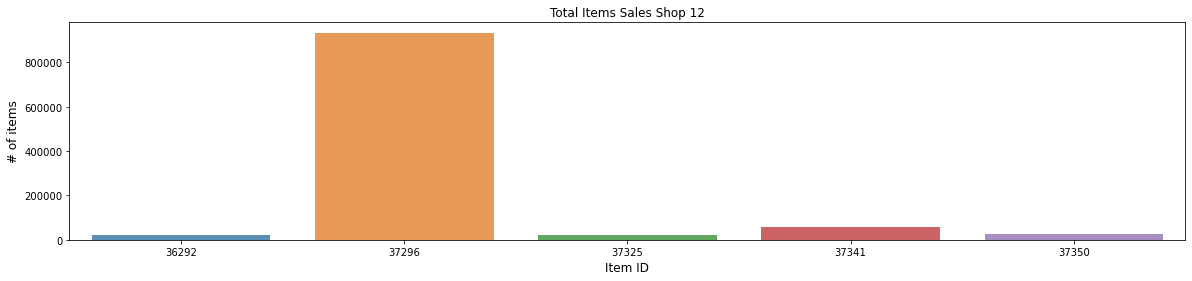

In [76]:
df_12 = df_litem.loc[df_litem['shop_id'] == 12]
# plot
plt.figure(figsize=(20,4))
ax=sns.barplot(df_12.item_id, df_12.item_cnt_month, alpha=0.8)
plt.title("Total Items Sales Shop 12")
plt.ylabel("# of items", fontsize=12)
plt.xlabel("Item ID", fontsize=12)
plt.show()

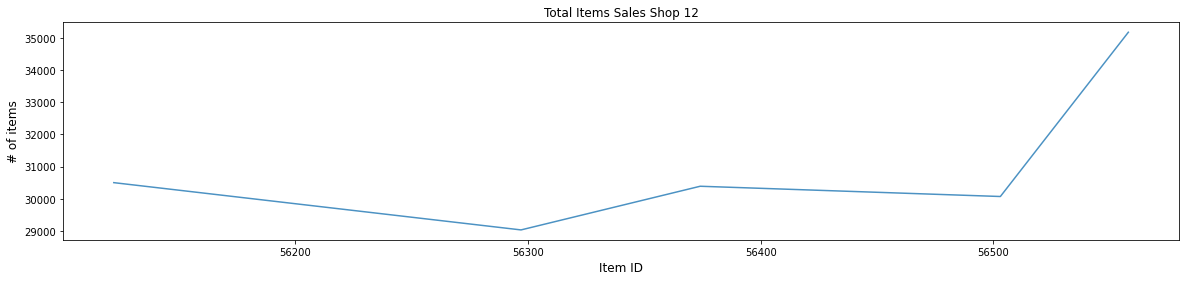

In [78]:
df_25 = df_litem.loc[df_litem['shop_id'] == 25]
# plot
plt.figure(figsize=(20,4))
ax=sns.lineplot(df_25.item_id, df_25.item_cnt_month, alpha=0.8)
plt.title("Total Items Sales Shop 25")
plt.ylabel("# of items", fontsize=12)
plt.xlabel("Item ID", fontsize=12)
plt.show()

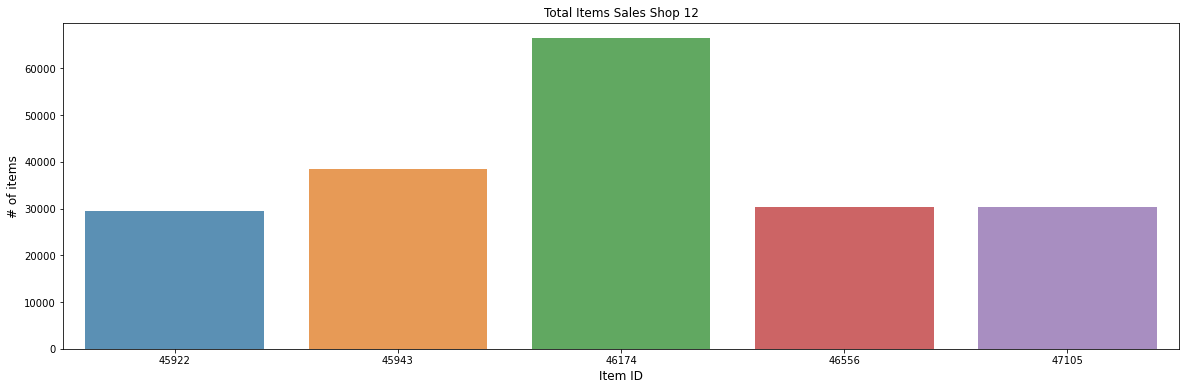

In [82]:
df_31 = df_litem.loc[df_litem['shop_id'] == 31]
# plot
plt.figure(figsize=(20,6))
ax=sns.barplot(df_31.item_id, df_31.item_cnt_month, alpha=0.8)
plt.title("Total Items Sales Shop 12")
plt.ylabel("# of items", fontsize=12)
plt.xlabel("Item ID", fontsize=12)
plt.show()